In [ ]:
#!pipenv install pandas numpy plotly wordcloud maplotlib seaborn bs4 emoji nltk scikit-learn catboost lightgbm xgboost  tensorflow jinja2 nbformat

In [1]:
import pandas as pd
import numpy as np

# for data visualization
import plotly.graph_objects as go
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

import re
import numpy as np
from bs4 import BeautifulSoup
import emoji
import nltk

from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize, sent_tokenize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
import lightgbm as lgb
from xgboost import XGBClassifier
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
from collections import Counter
import plotly.express as px

# Importing warnings
import warnings
warnings.filterwarnings('ignore')

# Deep learning libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, GlobalAveragePooling1D, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/brunoramoslemos/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
email = pd.read_csv('spam.csv')
email_style = email.head().style.set_table_styles([
    {"selector": "th", "props": [("color", 'black'), ("background-color", "#8aebf2"),('font-weight','bold')]}])
email_style

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


In [3]:
# Verificar campos nulos
email.isnull().sum()

Category    0
Message     0
dtype: int64

In [4]:
# Verificar valores duplicados
email.duplicated().sum()

415

In [5]:
# Excluir duplicados
email.drop_duplicates(inplace=True)
email.duplicated().sum()

0

In [6]:
# Quantidade de registros por categoria
df = email.groupby('Category').size()
df

Category
ham     4516
spam     641
dtype: int64

In [7]:
# Plot de gráfico pizza com quantidades por categoria usando plotly graph_objects
colors = ['#32a0a8', '#599173']
fig = go.Figure(data=[go.Pie(labels=df.index, values=df.values, textinfo ='label+percent', pull=[0.2,0],
                             marker=dict(colors=colors, line=dict(color='black', width=2)))])
fig.update_layout(paper_bgcolor='#dff2ef', plot_bgcolor='#dff2ef', title = 'Distribuição por categoria de e-mails', 
                  width=700, height=600, title_x=0.5, title_font_family="Times New Roman", title_font_color="#191e1f", 
                  title_font_size=30, font_family="Times New Roman", font_size=15)
fig.show()

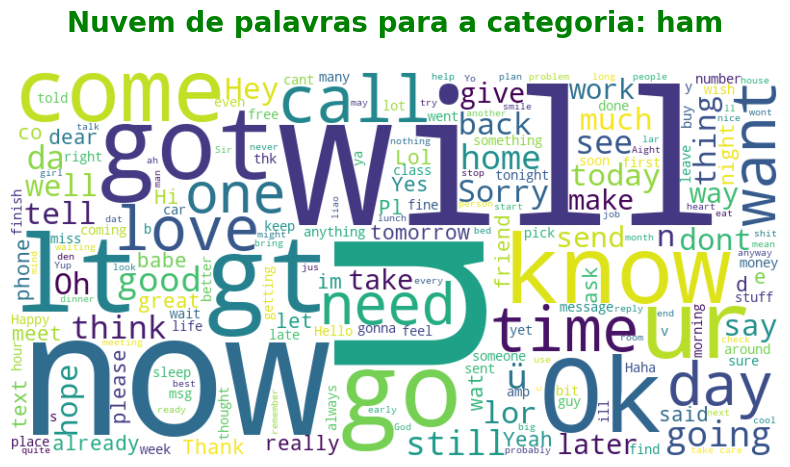

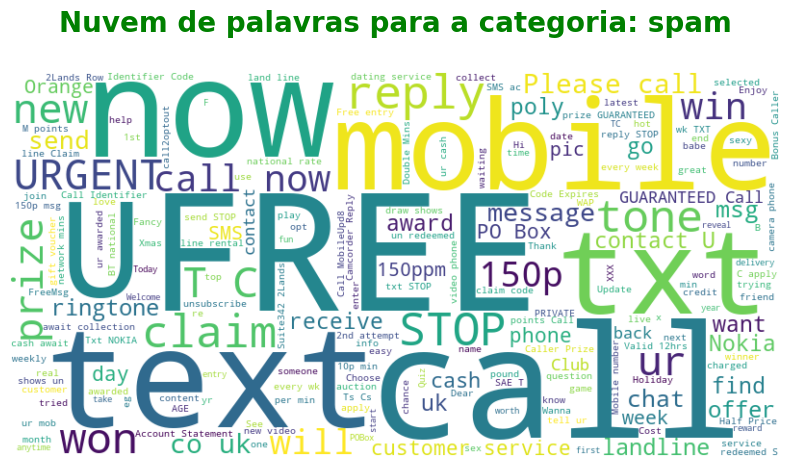

In [8]:
# Nuvem de palavras
for category in email['Category'].unique():
    # Filter the DataFrame for the current category
    cloud_data = email[email['Category'] == category]

    # Concatenate all text data for the current category
    text = ' '.join(cloud_data['Message'])

    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear', cmap='viridis')
    plt.title(f'Nuvem de palavras para a categoria: {category}\n', fontsize=20, fontweight='bold', color='green')
    plt.axis('off')
    plt.show()

In [9]:
# Contagem de caracteres, palavras e frases usando a lib NLTK. Os valores são colocados em novas features da base
# NLTK word_tokenize(x) =>  Retorna número de palavras
# NLTK len(sent_tokenize(x) => Retorna número de frases
email['No of Chars'] = email['Message'].str.len()
email['No of Words'] = email['Message'].apply(lambda x: len(word_tokenize(x)))
email['No of Sentences'] = email['Message'].apply(lambda x: len(sent_tokenize(x)))
email.head()

,Category,Message,No of Chars,No of Words,No of Sentences
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [10]:
email[email['Category'] == 'ham'].describe()

,No of Chars,No of Words,No of Sentences
count,4516.000000,4516.000000,4516.000000
mean,70.869353,17.267715,1.827724
std,56.708301,13.588065,1.394338
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [11]:
email[email['Category'] == 'spam'].describe()

,No of Chars,No of Words,No of Sentences
count,641.000000,641.000000,641.000000
mean,137.118565,27.667707,2.970359
std,30.399707,7.103501,1.485575
min,7.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [12]:
# Colocar todo o texto em lowercase
email['Message'] = email['Message'].apply(lambda x: x.lower())

In [17]:
email.tail(5)

,Category,Message,No of Chars,No of Words,No of Sentences
5567,spam,this is the 2nd time we have tried 2 contact u...,160,35,4
5568,ham,will ü b going to esplanade fr home?,36,9,1
5569,ham,"pity, * was in mood for that. so...any other s...",57,15,2
5570,ham,the guy did some bitching but i acted like i'd...,125,27,1
5571,ham,rofl. its true to its name,26,7,2


In [18]:
# Removedor de tags HTML
# Lib BeautifulSoup
def html_tag_remover(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()
email['Message'] = email['Message'].apply(lambda x: html_tag_remover(x))

In [19]:
# Remover espaços
email['Message'] = email['Message'].str.strip()

In [20]:
# Remover emojis
# Lib emoji
def emoji_remover(text):
    return emoji.demojize(text)

email['Message'] = email['Message'].apply(lambda x: emoji_remover(x))

In [21]:
# Remover caracteres especiais através de Regex
def remove_special_characters(text):

    pattern = r'[@#%&*^$£!()-_+={}\[\]:;<>,.?\/\\\'"`~]'  # Qualquer caractere que não seja alfanumérico ou espaço

    # Troca por espaço em branco
    clean_text = re.sub(pattern, '', text)

    return clean_text

# Apply the function to the 'Message' column
email['Message'] = email['Message'].apply(remove_special_characters)

In [22]:
# Remove números
def remove_numeric(text):
    return re.sub(r'\d+', '', text)

email['Message'] = email['Message'].apply(remove_numeric)

In [23]:
# Trocar expressões abreviadas pela versão completa
# Dicionário com mapeamento de expressões
# Define a dictionary of chat word mappings
chat_words = {
    "AFAIK": "As Far As I Know",
"AFK": "Away From Keyboard",
    "ASAP": "As Soon As Possible",
    "ATK": "At The Keyboard",
    "ATM": "At The Moment",
    "A3": "Anytime, Anywhere, Anyplace",
    "BAK": "Back At Keyboard",
    "BBL": "Be Back Later",
    "BBS": "Be Back Soon",
    "BFN": "Bye For Now",
    "B4N": "Bye For Now",
    "BRB": "Be Right Back",
    "BRT": "Be Right There",
    "BTW": "By The Way",
    "B4": "Before",
    "B4N": "Bye For Now",
    "CU": "See You",
    "CUL8R": "See You Later",
    "CYA": "See You",
    "FAQ": "Frequently Asked Questions",
    "FC": "Fingers Crossed",
    "FWIW": "For What It's Worth",
    "FYI": "For Your Information",
    "GAL": "Get A Life",
    "GG": "Good Game",
    "GN": "Good Night",
    "GMTA": "Great Minds Think Alike",
    "GR8": "Great!",
    "G9": "Genius",
    "IC": "I See",
    "ICQ": "I Seek you (also a chat program)",
    "ILU": "ILU: I Love You",
    "IMHO": "In My Honest/Humble Opinion",
    "IMO": "In My Opinion",
    "IOW": "In Other Words",
    "IRL": "In Real Life",
    "KISS": "Keep It Simple, Stupid",
    "LDR": "Long Distance Relationship",
    "LMAO": "Laugh My A.. Off",
    "LOL": "Laughing Out Loud",
    "LTNS": "Long Time No See",
    "L8R": "Later",
    "MTE": "My Thoughts Exactly",
    "M8": "Mate",
    "NRN": "No Reply Necessary",
    "OIC": "Oh I See",
    "PITA": "Pain In The A..",
    "PRT": "Party",
    "PRW": "Parents Are Watching",
    "QPSA?": "Que Pasa?",
    "ROFL": "Rolling On The Floor Laughing",
    "ROFLOL": "Rolling On The Floor Laughing Out Loud",
    "ROTFLMAO": "Rolling On The Floor Laughing My A.. Off",
    "SK8": "Skate",
    "STATS": "Your sex and age",
    "ASL": "Age, Sex, Location",
    "THX": "Thank You",
    "TTFN": "Ta-Ta For Now!",
    "TTYL": "Talk To You Later",
    "U": "You",
    "U2": "You Too",
    "U4E": "Yours For Ever",
    "WB": "Welcome Back",
    "WTF": "What The F...",
    "WTG": "Way To Go!",
    "WUF": "Where Are You From?",
    "W8": "Wait...",
    "7K": "Sick:-D Laugher",
    "TFW": "That feeling when",
    "MFW": "My face when",
    "MRW": "My reaction when",
    "IFYP": "I feel your pain",
    "TNTL": "Trying not to laugh",
    "JK": "Just kidding",
    "IDC": "I don't care",
    "ILY": "I love you",
    "IMU": "I miss you",
    "ADIH": "Another day in hell",
    "ZZZ": "Sleeping, bored, tired",
    "WYWH": "Wish you were here",
    "TIME": "Tears in my eyes",
    "BAE": "Before anyone else",
    "FIMH": "Forever in my heart",
    "BSAAW": "Big smile and a wink",
    "BWL": "Bursting with laughter",
    "BFF": "Best friends forever",
    "CSL": "Can't stop laughing"
}

In [25]:
# Função que realiza a troca
def chat_conversation(text):
    words = text.split()
    for i, w in enumerate(words):
        # i = index
        # w = palavra
        if w.upper() in chat_words:
            words[i] = chat_words[w.upper()]
        else:
            words[i] = w
    return ' '.join(words)


email['Message'] = email['Message'].apply(chat_conversation)

In [27]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/brunoramoslemos/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [28]:
# Remoção de STOPWORDS (Inglês)
stop_words = set(stopwords.words('english'))


def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)


email['Message'] = email['Message'].apply(remove_stopwords)
email.head()

,Category,Message,No of Chars,No of Words,No of Sentences
0,ham,go jurong point crazy available bugis n great ...,111,24,2
1,ham,ok lar joking wif oni,29,8,2
2,spam,free entry wkly comp win fa cup final tkts st ...,155,37,2
3,ham,dun say early hor c already say,49,13,1
4,ham,nah dont think goes usf lives around though,61,15,1


In [34]:
# Plotar gráfico com quantidade de stopwords
# Função para Tokenizar a frase e verificar cada palavra. Se a palavra não estiver entre as stopwords, retorna ela.
def filter_stopwords(text):
    tokens = word_tokenize(text.lower())
    return [word for word in tokens if word not in stop_words]

# Cria novo dataset apenas com categoria 'ham'
email1 = email[email['Category']=='ham']

# Aplica a função para pegar apenas as que não são stopword e jogar em nova feature no dataset email1
email1['stopwords'] = email1['Message'].apply(filter_stopwords)

# Contagem de frequencias
# Lista de palavras
stopword_list = [word for sublist in email1['stopwords'] for word in sublist]
# Conta a frequencia que cada palavra aparece
stopword_freq = Counter(stopword_list)

# Converter em Dataframe com as colunas 'Stopword' e 'Frequency'
stopword_df = pd.DataFrame(stopword_freq.items(), columns=['Stopword', 'Frequency']).sort_values(by='Frequency', ascending=False)

fig = px.bar(stopword_df[:10] , x = 'Stopword', y = 'Frequency',text = 'Frequency', color='Stopword',
             color_discrete_sequence=px.colors.sequential.PuRd,
             title = 'Ranqueamento de Palavras de e-mails legítimos',
             template = "simple_white"
              )

fig.update_layout(paper_bgcolor='#dff2ef', plot_bgcolor='#dff2ef', title='Ranqueamento de Palavras de e-mails legítimos',
                  title_x=0.5, font_color='black', font_family='Arial Black',font_size = 16,
                  xaxis_title = 'Palavra ou termo', xaxis=dict(showgrid=False, title=dict(font=dict(size=16, color='black',
                                                                                        family='Arial black'))),
                  yaxis=dict(showgrid=False,title=dict(font=dict(size=16, color='black', family='Arial black')))
                  )

fig.update_traces(textposition='inside',
                  textfont_size=11, marker_line_width=2, marker_line_color='black', opacity=0.8)
fig.show()

In [36]:
stopword_df

,Stopword,Frequency
55,im,438
241,get,304
28,dont,248
16,ok,247
0,go,244
...,...,...
1494,ahwhat,1
4216,unmits,1
4218,newspapers,1
1492,aathilove,1


In [37]:
# Agora com os textos dos e-mails categorizados como SPAM
email2 = email[email['Category']=='spam']

email2['stopwords'] = email2['Message'].apply(filter_stopwords)

stopword_list = [word for sublist in email2['stopwords'] for word in sublist]
stopword_freq = Counter(stopword_list)

stopword_df = pd.DataFrame(stopword_freq.items(), columns=['Stopword', 'Frequency']).sort_values(by='Frequency', ascending=False)

fig = px.bar(stopword_df[:10] , x = 'Stopword', y = 'Frequency',text = 'Frequency', color='Stopword',
             color_discrete_sequence=px.colors.sequential.PuBuGn,
             title = 'Rank of Spam Terms',
             template = "simple_white"
              )

fig.update_layout(paper_bgcolor='#dff2ef', plot_bgcolor='#dff2ef', title='Ranqueamento de palavras de e-mail SPAM',
                  title_x=0.5, font_color='black', font_family='Arial Black',font_size = 16,
                  xaxis_title = 'Palavra ou termo', xaxis=dict(showgrid=False, title=dict(font=dict(size=16, color='black', 
                                                                                        family='Arial black'))),
                  yaxis=dict(showgrid=False,title=dict(font=dict(size=16, color='black', family='Arial black')))
                  )

fig.update_traces(textposition='inside',
                  textfont_size=11, marker_line_width=2, marker_line_color='black', opacity=0.8)
fig.show()

In [39]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/brunoramoslemos/nltk_data...


True

In [40]:
# NLTK - Processo de redurir a palavra ao seu formato original
# Ex.: Children => Child, Are => be
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    words = word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

email['Message'] = email['Message'].apply(lemmatize_text)

In [41]:
# Tranformar os textos em vetores que possam ser lidos pelos algoritmos de Machine Learning
vectorizer = CountVectorizer(ngram_range=(2,2))

X = vectorizer.fit_transform(email['Message']).toarray().astype(float)

feature_names = vectorizer.get_feature_names_out()

In [42]:
feature_names

array(['aa exhaust', 'aah bless', 'aah cuddle', ..., 'üll submitting',
       'üll take', '〨ud evening'], dtype=object)

In [43]:
#TF-IDF is a statistical measure used to evaluate the importance of a word in a document relative to a collection of documents (or corpus). The importance increases proportionally to the number of times a word appears in the document but is offset by the frequency of the word in the corpus.
tfidf_transformer = TfidfTransformer()
X = tfidf_transformer.fit_transform(X)

In [44]:
# LabelEncoder transforma categorias em numeros 
y = email['Category']
le = LabelEncoder()
y = le.fit_transform(y)

In [45]:
# Separando dataset em treino e teste
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 8888)

In [46]:
# Instanciando modelos a serem usados
logreg = LogisticRegression(C=0.1, solver='liblinear', max_iter=500, random_state=8888)
mnb = MultinomialNB(alpha=0.1)
svm = SVC(C=10.0, kernel='rbf', gamma='auto', probability=True, random_state=8888)
rf = RandomForestClassifier(n_estimators=100, max_depth=15, min_samples_split=10, random_state=8888)
dt = DecisionTreeClassifier(max_depth=10, min_samples_split=5, random_state=8888)
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.05, max_depth=5, random_state=8888)
lgbm = lgb.LGBMClassifier(boosting_type='gbdt',objective='binary',random_state=8888)
catboost = CatBoostClassifier(random_state=8888, logging_level='Silent')
xgbr = XGBClassifier(objective='binary:hinge',random_state=8888)

In [47]:
# Treinamento dos modelos
logreg.fit(X_train, y_train)
mnb.fit(X_train, y_train)
svm.fit(X_train, y_train)
rf.fit(X_train, y_train)
dt.fit(X_train, y_train)
gb.fit(X_train, y_train)
catboost.fit(X_train, y_train)
xgbr.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='binary:hinge', ...)

In [48]:
classifiers = []
classifiers.append(logreg)
classifiers.append(mnb)
classifiers.append(svm)
classifiers.append(rf)
classifiers.append(dt)
classifiers.append(gb)
classifiers.append(xgbr)

model_name = ['Logreg', 'NB Multinomial', 'SVM', 'RandomForest', 'DecisionTree', 'GradientBoost','Catboost', 'XGB']

In [49]:
# Rodando os predicts de todos os modelos
accuracy_list = []
auc_list=[]
recall_list = []
f1_list = []
precision_list = []

for classifier in classifiers :
    y_pred=classifier.predict(X_test)
    y_pred_proba=classifier.predict_proba(X_test)[:,1]
    accuracy_list.append(accuracy_score(y_test,y_pred))
    auc_list.append(roc_auc_score(y_test, y_pred_proba))
    recall_list.append(recall_score(y_test, y_pred))
    f1_list.append(f1_score(y_test, y_pred))
    precision_list.append(precision_score(y_test, y_pred))

In [50]:
# Função para plotar métricas
def plot_model_score(model_name, accuracy_list, auc_list, recall_list, f1_list, title):

    fig = go.Figure(data=[
        go.Bar(name='Accuracy', x=model_name, y=np.round(accuracy_list,2), text=np.round(accuracy_list,3), marker_color='#97bad9'),
        go.Bar(name='AUC',x=model_name, y=np.round(auc_list,2), text=np.round(auc_list,3), marker_color= '#bcd6ef'),
        go.Bar(name='Recall',   x=model_name, y=np.round(recall_list,2), text=np.round(recall_list,3), marker_color='#ebcad9'),
        go.Bar(name='F1',       x=model_name, y=np.round(f1_list,2), text=np.round(f1_list,3), marker_color='#d5a6bd'),
        go.Bar(name='Precision',x=model_name, y=np.round(precision_list,2), text=np.round(precision_list,3), marker_color='#d5a6bd')
    ])

    fig.update_layout(template = 'simple_white', title = title, title_x=0.5)
    fig.update_layout(xaxis_title="Models", yaxis_title="Score", font = dict(size=17, family = 'Franklin Gothic'))
    fig.update_layout(yaxis_range=[0,1])
    fig.update_traces(marker_line_width=2, marker_line_color='black')
    fig.show()

In [51]:
plot_model_score(model_name, accuracy_list, auc_list, recall_list, f1_list,
                 'Accuracy, AUC, Recall Score F1 Score & Precision')